In [76]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [77]:
df = pd.read_csv("https://raw.githubusercontent.com/jkmg/Iris/main/Iris.csv", delimiter = ",")
df.drop(columns = "Id", inplace = True)
print(df)
#Descripcción analítica de variables numéricas
df.describe().T

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [78]:
#Descripción analítica de variables categóricas
df.describe(include=object).T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


<AxesSubplot:>

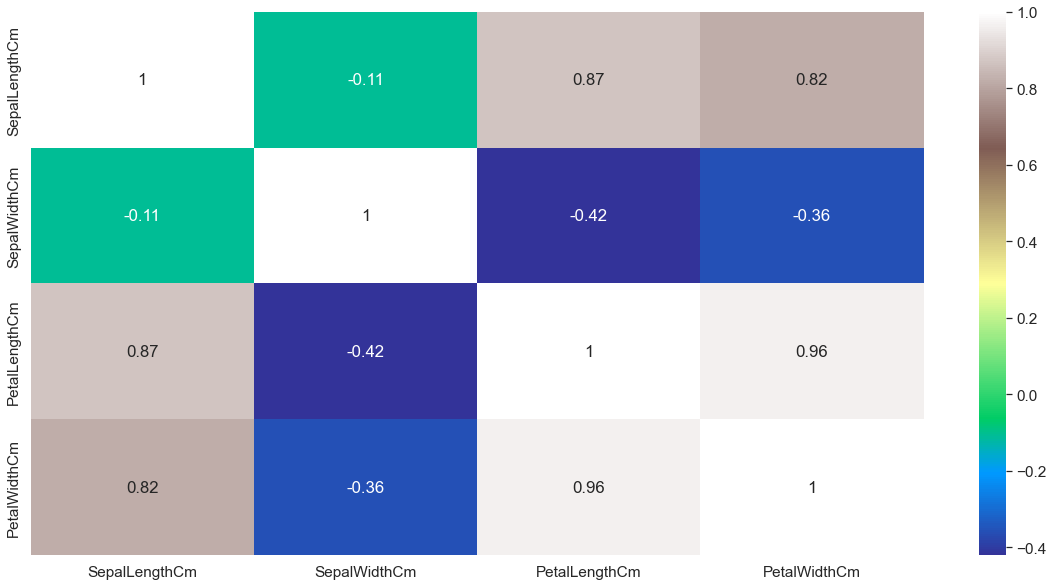

In [79]:
#Correlación entre variables numéricas

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

In [80]:
#Conversión de la variable categórica Species en numérica (como "SpeciesNum") para calcular el VIF
species_mapper = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
def species_encode(val):
    return species_mapper[val]

df['Species'] = df['Species'].apply(species_encode)
print(df)

#Dividir el dataset en variables numéricas y categóricas
numerical = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy()
categorical = df[['Species']].copy()

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

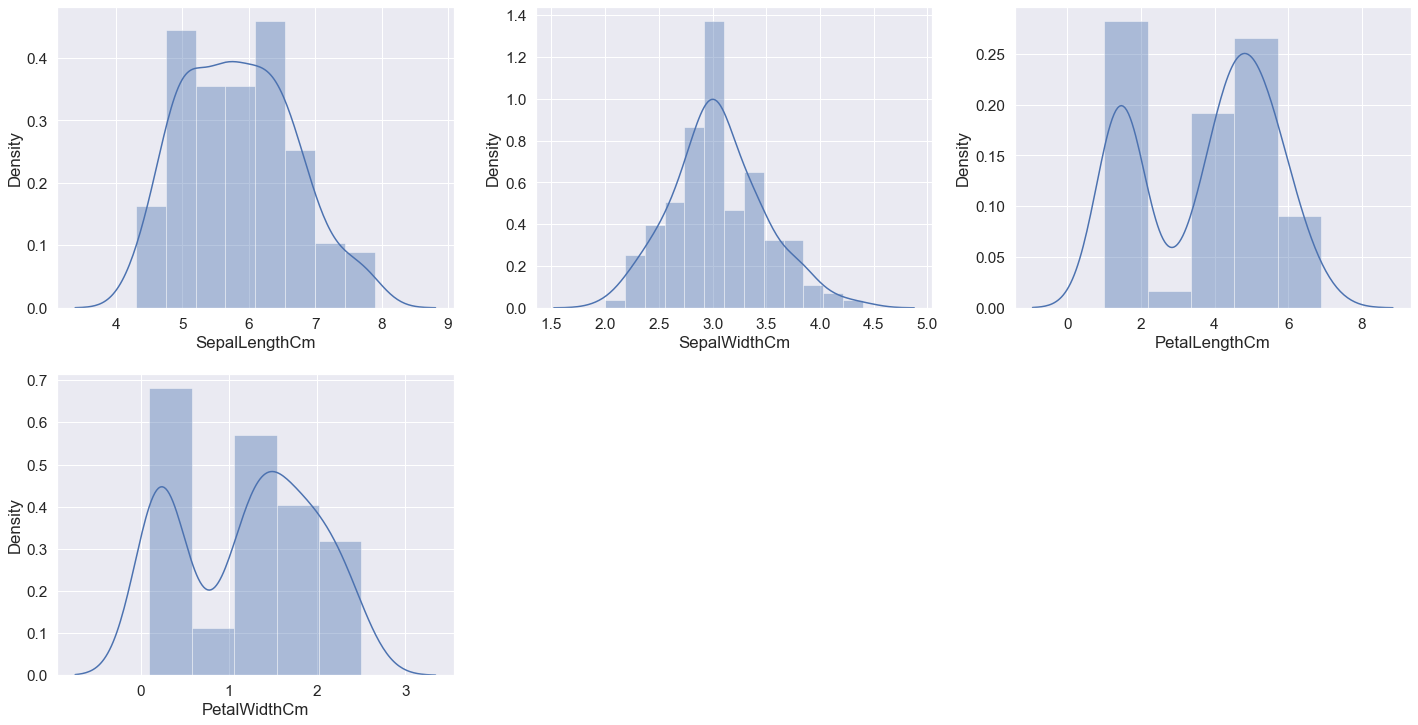

In [81]:
#Ver la distribución de valores de cada variable numérica.

plt.figure(figsize=(20,20))
index = 0
for index, feature in enumerate(numerical):
    index += 1
    plt.subplot(4, 3, index)
    plt.tight_layout()
    sns.distplot(numerical[feature])

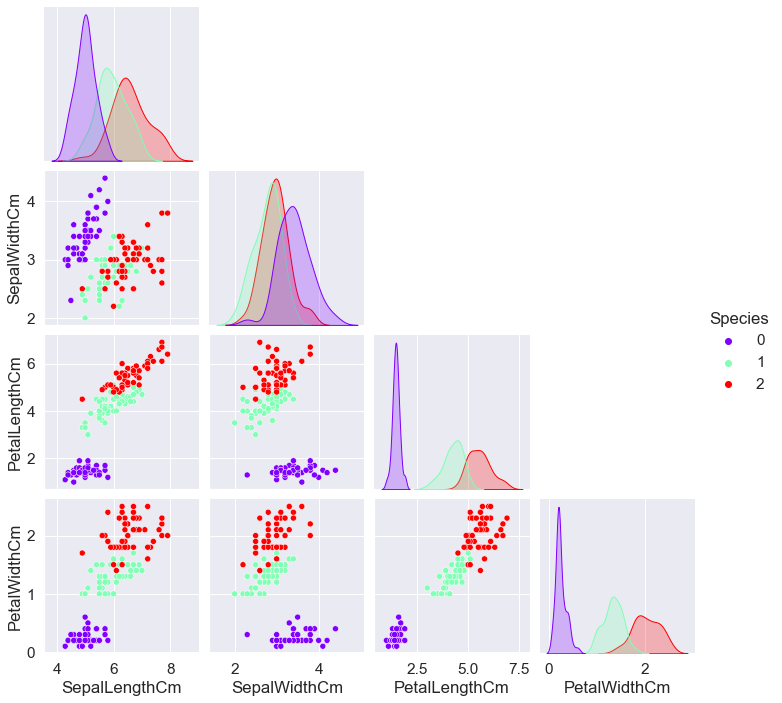

In [82]:
#Visualización de la distribución de valores de las variables numéricas 
sns.pairplot(df, hue="Species", palette="rainbow", corner=True)

In [84]:
#Cálculo de la Multicolinealidad de las variables numéricas mediante el variance inflation factor (VIF) 

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Construcción de la matriz para la regresión lineal usando Species como variable respuesta
y, X = dmatrices('Species ~ SepalLengthCm+SepalWidthCm+PetalLengthCm+PetalWidthCm', data=df, return_type='dataframe')

#Cálculo del VIF para cada variable numérica que queremos usar para predecir la variable HeartDisease
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,130.983718,Intercept
1,7.103113,SepalLengthCm
2,2.099039,SepalWidthCm
3,31.397292,PetalLengthCm
4,16.141564,PetalWidthCm


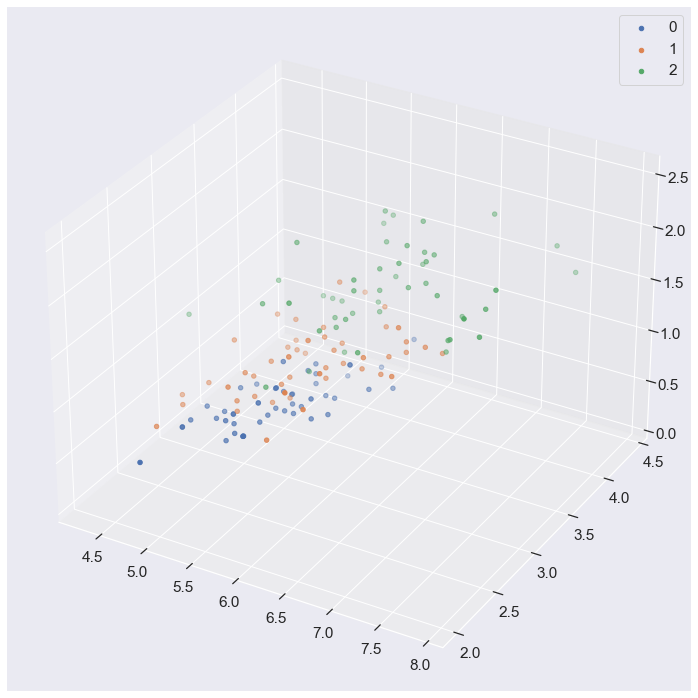

In [85]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for s in df.Species.unique():
    ax.scatter(df.SepalLengthCm[df.Species==s],df.SepalWidthCm[df.Species==s],df.PetalWidthCm[df.Species==s],label=s)
    
ax.legend()
fig.tight_layout()
plt.show()

In [38]:
#Importar librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [88]:
# Random Forest

X = df.drop(["Species", "PetalLengthCm"], axis=1) #Selección de las variables a usar para la predicción
y = df["Species"] #Selección de la variable a predecir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 40)

rf = RandomForestClassifier(n_estimators=30, criterion = 'entropy', random_state=50, class_weight='balanced', max_depth=5)
rfmodel = rf.fit(X_train, y_train)
rfpred = rfmodel.predict(X_test)
print(rfpred)
rfaccuracy = accuracy_score(y_test,rfpred)
print(f'La precisión del modelo Random Forest es: {rfaccuracy}')

print(classification_report(y_test, rfpred))

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0 2 0 0 1 2 2 2]
La precisión del modelo Random Forest es: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [89]:
# Saving the model
import pickle
pickle.dump(rfmodel, open('iris_rf.pkl', 'wb'))

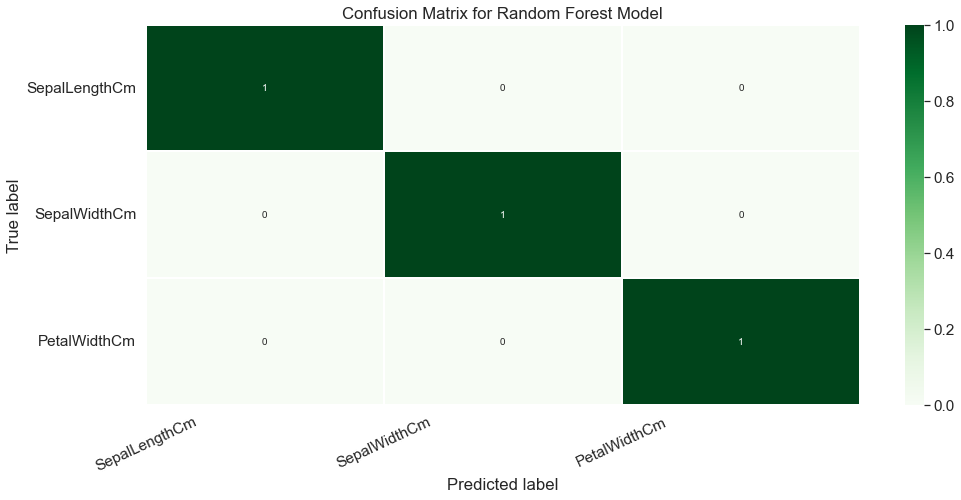

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfpred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'] 

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()